In [1]:
import torch
import pickle
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from soft_thresholding.SoftThresholdNet import SoftThresholdNet

from plain_net.PlainNet import PlainNet
from duffing_dataset import *

In [2]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    data = pickle.load(f)

In [51]:
t = torch.linspace(0, data.DT * len(data.x), len(data.y))

training_set, validation_set = torch.utils.data.random_split(data, [int(0.8 * len(data)), len(data) - int(0.8 * len(data))])
training_loader = DataLoader(training_set.dataset, batch_size=100, shuffle=True)
validation_loader = DataLoader(validation_set.dataset, shuffle=True)

In [52]:
model = SoftThresholdNet(3, [[24, 24], [24, 24]], 2, s_init=1)

In [54]:
model.train_n_epochs(data_loader=training_loader, n_epochs = 1000, lr = 0.00001, weight_decay=0.0001, verbose=True)

Epoch 0: loss 7.161444187164307
Epoch 100: loss 0.7419614195823669
Epoch 200: loss 0.3228304088115692
Epoch 300: loss 0.26141971349716187
Epoch 400: loss 0.1833493411540985
Epoch 500: loss 0.19865693151950836
Epoch 600: loss 0.13322904706001282
Epoch 700: loss 0.12610206007957458
Epoch 800: loss 0.2639446556568146
Epoch 900: loss 0.14512518048286438


In [55]:
y_pred = model(validation_set.dataset.x)

In [57]:
torch.sum((y_pred - training_loader.dataset.y)**2) / len(training_loader.dataset.y)

tensor(0.2352, grad_fn=<DivBackward0>)

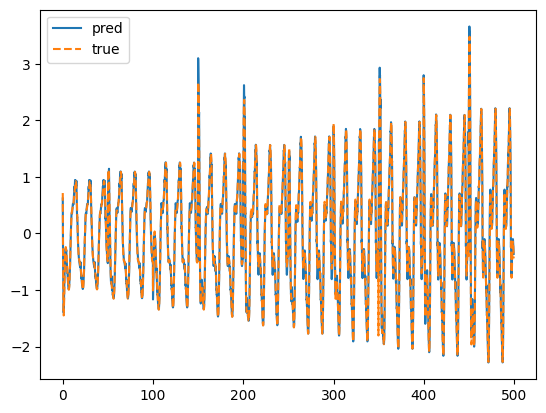

In [58]:
plt.plot(t, y_pred[:, 0].detach().numpy(), label='pred')
plt.plot(t, validation_loader.dataset.y[:, 0].detach().numpy(), label='true', linestyle='--')
plt.legend()

In [60]:
s_threshhold = [layer.s.detach().item() for layer in model.layers]

In [61]:
s_threshhold

[0.8642807006835938, 1.162282943725586, 1.038082242012024, 0.8769857287406921]

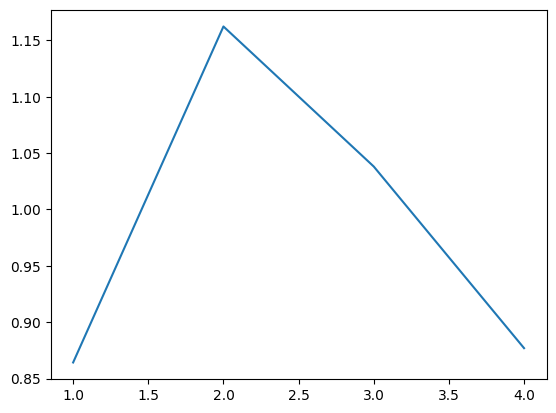

In [62]:
plt.plot(np.linspace(1, len(s_threshhold), len(s_threshhold)), s_threshhold)

In [63]:
model.get_sparsity()

tensor(0.6808)

In [64]:
model.layers[0].get_sparse_weights()

tensor([[-1.2573, -0.9365,  0.0000,  0.6728, -0.4489, -0.0000,  0.1330, -0.0000,
          0.0000,  0.0000,  0.5550,  0.0000, -1.0030, -0.2766, -0.0000, -0.3034,
          0.0000, -0.0000,  0.0000, -0.6590,  0.1307,  1.0910, -0.2309,  0.9357],
        [ 0.0000, -0.0000, -0.1805,  0.0000,  0.0000, -0.2149,  1.0296,  0.0000,
         -0.8261,  0.0000,  0.0000,  0.0000,  0.2248, -0.0000,  1.5845, -0.0000,
          0.4919, -0.0000, -0.0000,  0.0000,  0.3709, -0.0000, -0.6253,  0.0000],
        [-0.6906, -0.0000,  1.7637, -0.0000,  0.0000, -0.0000,  0.6700,  0.5790,
          0.0000,  0.5110,  0.6749,  0.3496,  1.2029,  0.4445, -0.4895, -0.0000,
          0.0000,  0.6824,  0.0000, -0.0000, -0.0000,  0.5447,  0.0000, -0.0000]],
       grad_fn=<MulBackward0>)